In [1]:
import yfinance as yf
import pandas as pd

In [2]:
Tesla=yf.Ticker("TSLA")

In [3]:
Tesla=Tesla.history(period="max")

<Axes: xlabel='Date'>

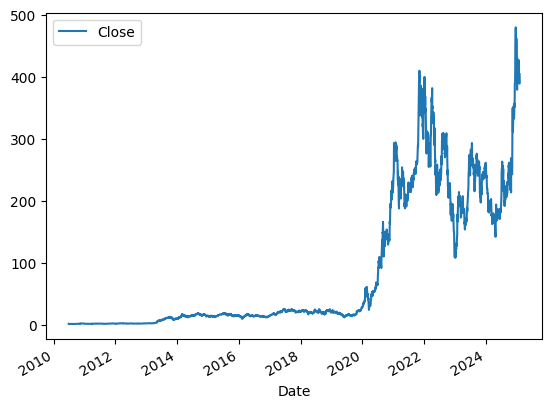

In [4]:
Tesla.plot.line(y="Close", use_index=True)

In [5]:
Tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,394.799988,406.690002,389.000000,397.149994,58125500,0.0,0.0
2025-01-28 00:00:00-05:00,396.910004,400.589996,386.500000,398.089996,48910700,0.0,0.0
2025-01-29 00:00:00-05:00,395.209991,398.589996,384.480011,389.100006,68033600,0.0,0.0


In [ ]:
del Tesla["Dividends"]
del Tesla["Stock Splits"]

SO NOW MOVING AHEAD WITH PREDICTING PRICE ADDING NEW COLOUMN TOMORROW WHCIH WILL HAVE CLOSING PRICE OF NEXT DAY IN IT SO WITH THAT WE CAN MOVE PREDICTION PROCESS FURTHER

In [6]:
Tesla["Tomorrow"] = Tesla["Close"].shift(-1)
Tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.053333
...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,394.799988,406.690002,389.000000,397.149994,58125500,0.0,0.0,398.089996
2025-01-28 00:00:00-05:00,396.910004,400.589996,386.500000,398.089996,48910700,0.0,0.0,389.100006
2025-01-29 00:00:00-05:00,395.209991,398.589996,384.480011,389.100006,68033600,0.0,0.0,400.279999


Now lets evaluvate that is today close price greater then or less than tomorrow price and then give it label as 0 and 1 if tomorrow price is greater then todays price then 1 and if not then 0

In [ ]:
Tesla["Target"] = (Tesla["Tomorrow"] > Tesla["Close"]).astype(int)

In [ ]:
Tesla

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667,0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000,0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000,0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000,0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333,0
...,...,...,...,...,...,...,...
2024-11-25 00:00:00-05:00,360.140015,361.929993,338.200012,338.589996,95890900,338.230011,0
2024-11-26 00:00:00-05:00,341.000000,346.959991,335.660004,338.230011,62295900,332.890015,0
2024-11-27 00:00:00-05:00,341.799988,342.549988,326.589996,332.890015,57896400,345.160004,1


Now iitializing random forest classifier n_estimator=number of decision tree we want to improve accuracy , min_sample_split protect against overfitting

Considering all og the rows except last 500 rows in training and consider last 500 rows in test this will work best in time series as I tried cross validation but that causes data leakage problem .

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = Tesla.iloc[:-250]
test = Tesla.iloc[-250:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Now will first take prediction from test set  and then compare actual target and predicted target.

In [ ]:

# Generate predictions for the test set
predictions = model.predict(test[predictors])

# Add the predictions to the test DataFrame
test["Predicted_Target"] = predictions

# Print the actual and predicted targets
print(test[["Target", "Predicted_Target"]])


                           Target  Predicted_Target
Date                                               
2023-12-05 00:00:00-05:00       1                 1
2023-12-06 00:00:00-05:00       1                 1
2023-12-07 00:00:00-05:00       1                 1
2023-12-08 00:00:00-05:00       0                 1
2023-12-11 00:00:00-05:00       0                 1
...                           ...               ...
2024-11-25 00:00:00-05:00       0                 0
2024-11-26 00:00:00-05:00       0                 0
2024-11-27 00:00:00-05:00       1                 1
2024-11-29 00:00:00-05:00       1                 1
2024-12-02 00:00:00-05:00       0                 1

[250 rows x 2 columns]


<ipython-input-160-d85d5e7031a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted_Target"] = predictions


Now we will check using confusion metrics, accuracy and precision that when we said market will boost up does it really went up
?

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5315315315315315

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

# Calculate Accuracy Score
accuracy = accuracy_score(test["Target"], preds)


print(f"Accuracy Score: {accuracy:.2f}")

# Print confusion matrix
cm = confusion_matrix(test["Target"], preds)
print("Confusion Matrix:")
print(cm)


Accuracy Score: 0.52
Confusion Matrix:
[[72 52]
 [67 59]]


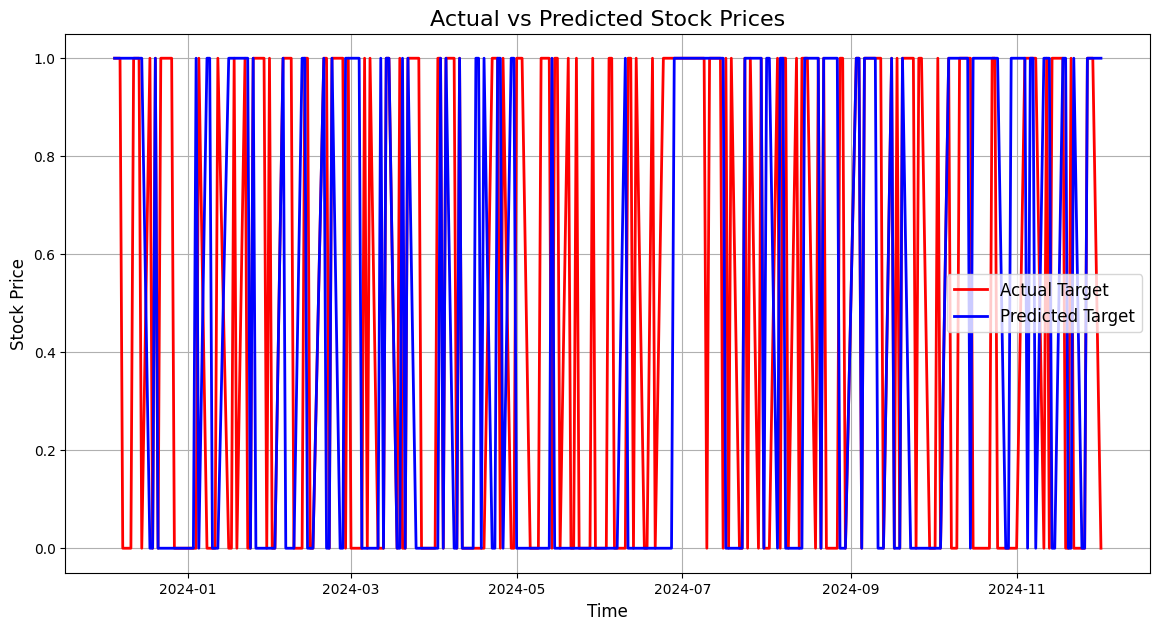

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot for actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(test.index, test["Target"], label="Actual Target", color="red", linewidth=2)
plt.plot(test.index, preds, label="Predicted Target", color="blue", linewidth=2)

# Add title, labels, and legend
plt.title("Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Stock Price", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


Now we will count occurance of each prediction

In [ ]:
import pandas as pd
predictions_series = pd.Series(predictions)
print(predictions_series.value_counts())



0    139
1    111
Name: count, dtype: int64


Here as I am getting very less precision and acccuracy will try to improve it by doing back test and adding additional predictors.

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

Training first model with 2500 days of data (2 years considering every stop year is of 150 days and considering step as 30 for back sliding)

In [ ]:
def backtest(data, model, predictors, start=2500, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

Now we will calculate rolling mean of last 2 days then 5 then 60 and so on then we will find ratio between todays rolling price and rolling price in that specified time and in trend_column it will consider supoose 5 days then it will do sum of target values in last 5 days and then move forward this time as shift(1) initially

In [ ]:
rolling_time= [2,5,60,250,1000]
new_predictors = []

for rolling_time in rolling_time: #looping around
    rolling_averages = Tesla.rolling(rolling_time).mean()

    ratio_column = f"Close_Ratio_{rolling_time}"
    Tesla[ratio_column] = Tesla["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{rolling_time}"
    Tesla[trend_column] = Tesla.shift(1).rolling(rolling_time).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
Tesla = Tesla.dropna()


In [ ]:
Tesla

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2014-06-19 00:00:00-04:00,15.258667,15.687333,15.133333,15.186000,131896500,15.306000,1,1.001473,1.0,1.019094,4.0,1.104864,30.0,1.305755,134.0,3.367118,516.0
2014-06-20 00:00:00-04:00,15.234667,15.419333,15.080000,15.306000,73558500,15.814667,1,1.003935,2.0,1.006285,4.0,1.112100,31.0,1.312219,134.0,3.383434,517.0
2014-06-23 00:00:00-04:00,15.300667,15.932667,15.214667,15.814667,116866500,15.500000,0,1.016345,2.0,1.028360,4.0,1.146291,32.0,1.351662,134.0,3.484822,518.0
2014-06-24 00:00:00-04:00,15.931333,16.125334,15.442000,15.500000,121138500,15.792667,1,0.989951,1.0,1.007174,3.0,1.121665,31.0,1.320951,133.0,3.404815,518.0
2014-06-25 00:00:00-04:00,15.536667,15.836667,15.349333,15.792667,87024000,15.706667,0,1.009353,1.0,1.017578,4.0,1.140236,32.0,1.342000,133.0,3.457924,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22 00:00:00-05:00,341.089996,361.529999,337.700012,352.559998,89140700,338.589996,0,1.018665,1.0,1.025498,3.0,1.371937,32.0,1.641383,126.0,1.479792,523.0
2024-11-25 00:00:00-05:00,360.140015,361.929993,338.200012,338.589996,95890900,338.230011,0,0.979787,1.0,0.984949,2.0,1.307023,31.0,1.573652,125.0,1.420316,522.0
2024-11-26 00:00:00-05:00,341.000000,346.959991,335.660004,338.230011,62295900,332.890015,0,0.999468,0.0,0.988370,1.0,1.295000,31.0,1.569234,125.0,1.417982,521.0


Now here we will again run random forest classifer with min-sample_split as 50 instead of 100 and in preds=predict_proba that will calculate probaility that row will return 0 or 1 and will add it coloumn and will add threshold at 60 % that if model is confident for  that price will go up with probailityof 60% or more it will show or else zero

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(Tesla, model, new_predictors)


In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,116
1.0,15


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])




0.6666666666666666

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, confusion_matrix
precision = precision_score(predictions["Target"], predictions["Predictions"])
accuracy = accuracy_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])
print(f"Precision Score: {precision:.2f}")
print(f"Accuracy Score: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
cm = confusion_matrix(predictions["Target"], predictions["Predictions"])
print("Confusion Matrix:")
print(cm)


Precision Score: 0.67
Accuracy Score: 0.50
F1 Score: 0.24
Confusion Matrix:
[[56  5]
 [60 10]]


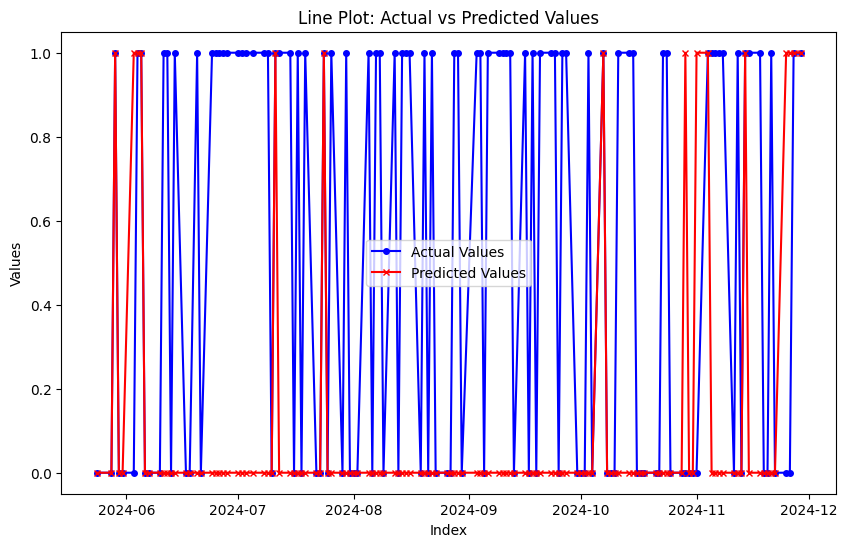

In [ ]:
import matplotlib.pyplot as plt
predictions_sorted = predictions.sort_index()
actual_values = predictions_sorted["Target"]
predicted_values = predictions_sorted["Predictions"]
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(predicted_values, label='Predicted Values', color='red', linestyle='-', marker='x', markersize=4)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot: Actual vs Predicted Values')
plt.legend()
plt.show()


Now LSTM will be used as it is used in time series data for processing and predicting

In [ ]:
# Save the training and testing datasets as CSV files
import os

# Specify the output directory
output_dir = r"C:\Users\vishwa\Desktop\3wa\bigdata\ML_Project_start"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define file paths for the datasets
train_file = os.path.join(output_dir, "train_dataset.csv")
test_file = os.path.join(output_dir, "test_dataset.csv")

# Save training and testing datasets
train.to_csv(train_file, index=True)
test.to_csv(test_file, index=True)

print(f"Training dataset saved to: {train_file}")
print(f"Testing dataset saved to: {test_file}")


Training dataset saved to: C:\Users\vishwa\Desktop\3wa\bigdata\ML_Project_start/train_dataset.csv
Testing dataset saved to: C:\Users\vishwa\Desktop\3wa\bigdata\ML_Project_start/test_dataset.csv


In [ ]:
import pandas as pd

# Load the datasets
train_dataset = pd.read_csv('train_dataset.csv')
test_dataset = pd.read_csv('test_dataset.csv')

# Remove the 'Target' and 'Tomorrow' columns
train_dataset = train_dataset.drop(columns=['Target', 'Tomorrow'])
test_dataset = test_dataset.drop(columns=['Target', 'Tomorrow'])

# Save the updated datasets back to CSV
train_dataset.to_csv('train_dataset_updated.csv', index=False)
test_dataset.to_csv('test_dataset_updated.csv', index=False)




In [ ]:
import pandas as pd

# Load the datasets
train_dataset = pd.read_csv('train_dataset_updated.csv')
test_dataset = pd.read_csv('test_dataset_updated.csv')

# Check the column names to verify if 'Predicted_Target' exists
print(train_dataset.columns)
print(test_dataset.columns)
# Delete 'Predicted_Target' column if it exists
if 'Predicted_Target' in train_dataset.columns:
    del train_dataset['Predicted_Target']
if 'Predicted_Target' in test_dataset.columns:
    del test_dataset['Predicted_Target']

# Optionally, save the updated datasets back to CSV
train_dataset.to_csv('train_dataset_final.csv', index=False)
test_dataset.to_csv('test_dataset_final.csv', index=False)



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Target'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
import pandas as pd
data = pd.read_csv("train_dataset_final.csv")
data.head()
data = pd.read_csv("test_dataset_final.csv")
data.head()



,Date,Open,High,Low,Close,Volume
0,2023-11-29 00:00:00-05:00,249.210007,252.750000,242.759995,244.139999,135401300
1,2023-11-30 00:00:00-05:00,245.139999,245.220001,236.910004,240.080002,132353200
2,2023-12-01 00:00:00-05:00,233.139999,240.190002,231.899994,238.830002,121173500
3,2023-12-04 00:00:00-05:00,235.750000,239.369995,233.289993,235.580002,104099800
4,2023-12-05 00:00:00-05:00,233.869995,246.660004,233.699997,238.720001,137971100


Now considering close as training data so will convert it  to numeric

In [ ]:
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

Now rescale data and keep values between 0 and 1 for better performance

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(trainData)
trainData.shape

(250, 1)

LSTM is 3d so sequence length,stepsize and batchsize

In [ ]:
X_train = []
y_train = []
for i in range(60, len(trainData)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  #adding batchsize
X_train.shape

(190, 60, 1)

Using sequential model

In [ ]:
model= Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
hist=model.fit(X_train, y_train, epochs=20, batch_size=32,verbose=2) #epoch numver of times dataset will be passed through ,#batch_size=no of smaples taken from training set.

Epoch 1/20
6/6 - 11s - 2s/step - loss: 0.1102
Epoch 2/20
6/6 - 1s - 143ms/step - loss: 0.0664
Epoch 3/20
6/6 - 2s - 343ms/step - loss: 0.0585
Epoch 4/20
6/6 - 2s - 394ms/step - loss: 0.0546
Epoch 5/20
6/6 - 2s - 309ms/step - loss: 0.0527
Epoch 6/20
6/6 - 2s - 351ms/step - loss: 0.0516
Epoch 7/20
6/6 - 2s - 334ms/step - loss: 0.0519
Epoch 8/20
6/6 - 1s - 213ms/step - loss: 0.0503
Epoch 9/20
6/6 - 1s - 204ms/step - loss: 0.0507
Epoch 10/20
6/6 - 1s - 217ms/step - loss: 0.0504
Epoch 11/20
6/6 - 1s - 140ms/step - loss: 0.0496
Epoch 12/20
6/6 - 1s - 144ms/step - loss: 0.0496
Epoch 13/20
6/6 - 1s - 143ms/step - loss: 0.0494
Epoch 14/20
6/6 - 1s - 145ms/step - loss: 0.0494
Epoch 15/20
6/6 - 1s - 145ms/step - loss: 0.0494
Epoch 16/20
6/6 - 1s - 147ms/step - loss: 0.0490
Epoch 17/20
6/6 - 1s - 233ms/step - loss: 0.0490
Epoch 18/20
6/6 - 2s - 357ms/step - loss: 0.0490
Epoch 19/20
6/6 - 1s - 142ms/step - loss: 0.0485
Epoch 20/20
6/6 - 1s - 209ms/step - loss: 0.0488


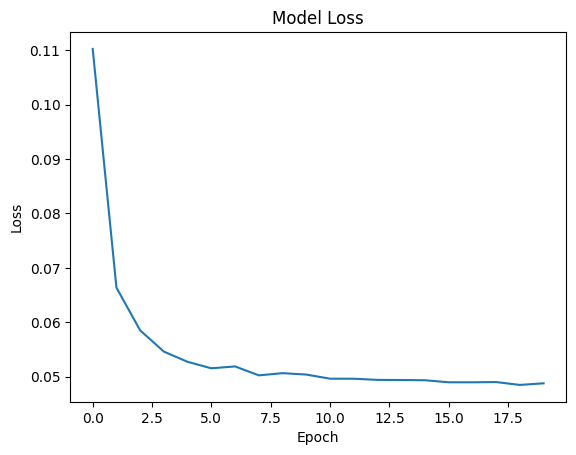

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

as curve goes down model is learning paraameter and perform well

In [ ]:
testData = pd.read_csv("test_dataset_final.csv")
testData = testData.dropna()
testData_subset = testData.iloc[:, 4:5]
y_test = testData_subset.iloc[10:, :].values
inputClosing = testData_subset.values
inputClosing_scaled = scaler.transform(inputClosing)
X_test = []
length = len(testData_subset)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i - timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"X_test shape: {X_test.shape}")

print(f"y_test shape: {y_test.shape}")



X_test shape: (190, 60, 1)
y_test shape: (240, 1)


In [ ]:
# Remove the extra dimension to make it 2D (190, 60)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Now predict using the model
y_pred = model.predict(X_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step


In [ ]:

y_pred_reshaped = y_pred.reshape(-1, 1)




In [ ]:
predicted_price =scaler.inverse_transform(y_pred_reshaped)

print(predicted_price)
print(f"predicted_price shape: {predicted_price.shape}")

[[164.72804]
 [178.0316 ]
 [189.2199 ]
 ...
 [214.41414]
 [214.41496]
 [214.40515]]
predicted_price shape: (11400, 1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def create_sequences(data, timestep=60):
    X, y = [], []
    for i in range(timestep, len(data)):
        X.append(data[i - timestep:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

timestep = 60
X_train, y_train = create_sequences(train_close_scaled, timestep)
X_test, y_test = create_sequences(test_close_scaled, timestep)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
#history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, color='red', label='Actual Stock Price')
plt.plot(y_pred_rescaled, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

tolerance = 0.05
percentage_diff = np.abs(y_test_rescaled - y_pred_rescaled) / y_test_rescaled
accuracy = np.mean(percentage_diff <= tolerance) * 100
precision = np.sum(percentage_diff <= tolerance) / len(y_test_rescaled) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

<ipython-input-199-f0f5632c2558>:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  trainData['Date'] = pd.to_datetime(trainData['Date'])
<ipython-input-199-f0f5632c2558>:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  testData['Date'] = pd.to_datetime(testData['Date'])


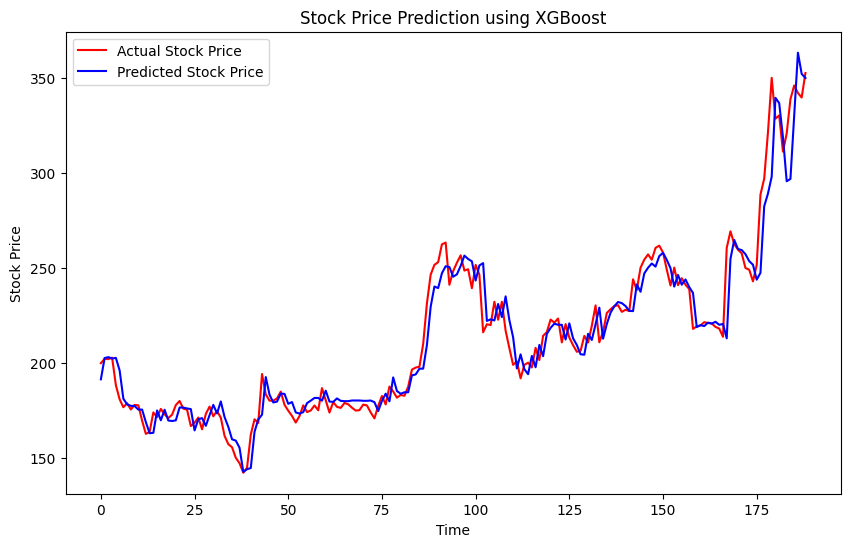

Mean Squared Error: 118.61
Mean Absolute Error: 7.28
R² Score: 0.94
Accuracy: 81.48%
Precision: 81.48%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

trainData = pd.read_csv("train_dataset.csv")
testData = pd.read_csv("test_dataset.csv")

trainData['Date'] = pd.to_datetime(trainData['Date'])
testData['Date'] = pd.to_datetime(testData['Date'])
trainData.dropna(inplace=True)
testData.dropna(inplace=True)

train_data = trainData[['Date', 'Close']].set_index('Date')
test_data = testData[['Date', 'Close']].set_index('Date')

scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data[['Close']])
test_data_scaled = scaler.transform(test_data[['Close']])

def prepare_data(data, timestep):
    X, y = [], []
    for i in range(timestep, len(data)):
        X.append(data[i-timestep:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

timestep = 60
X_train, y_train = prepare_data(train_data_scaled, timestep)
X_test, y_test = prepare_data(test_data_scaled, timestep)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, color='red', label='Actual Stock Price')
plt.plot(y_pred_rescaled, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction using XGBoost')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

r2 = r2_score(y_test_rescaled, y_pred_rescaled)

tolerance = 0.05
percentage_diff = np.abs(y_test_rescaled - y_pred_rescaled) / y_test_rescaled
accuracy = np.mean(percentage_diff <= tolerance) * 100
precision = np.sum(percentage_diff <= tolerance) / len(y_test_rescaled) * 100

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")

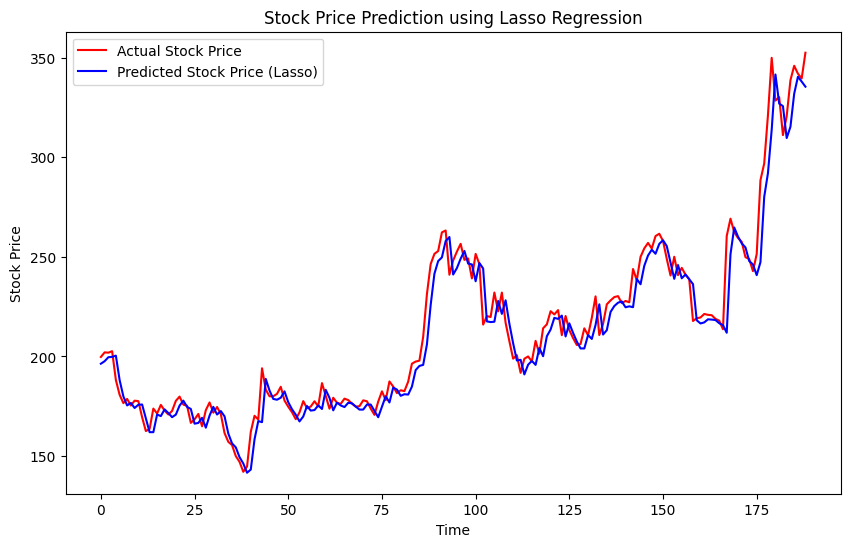

Mean Squared Error: 99.21
Mean Absolute Error: 6.73
R² Score: 0.95
Lasso Regression Accuracy: 82.54%
Lasso Regression Precision: 82.54%


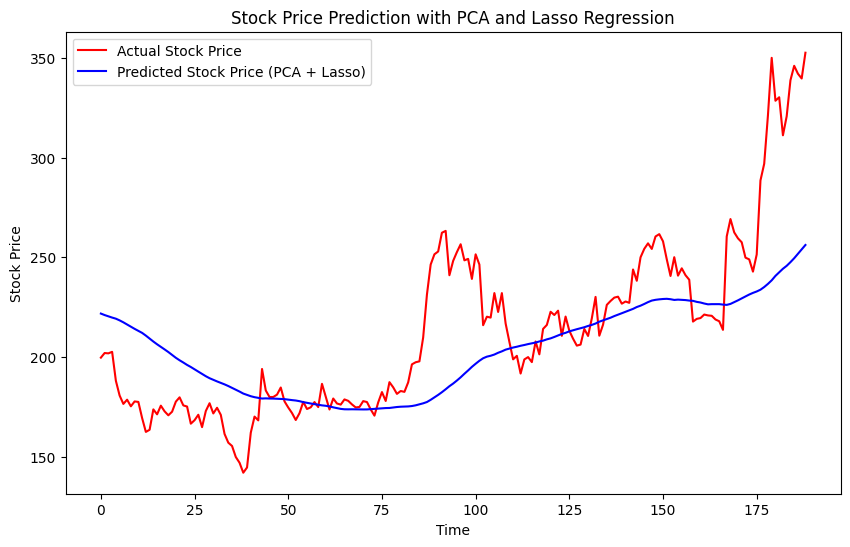

PCA + Lasso Accuracy: 39.68%
PCA + Lasso Precision: 39.68%


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
def prepare_data(data, timestep):
    X, y = [], []
    for i in range(timestep, len(data)):
        X.append(data[i-timestep:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

timestep = 60

X_train, y_train = prepare_data(train_data_scaled, timestep)
X_test, y_test = prepare_data(test_data_scaled, timestep)


X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


lasso = Lasso(alpha=0.001)
lasso.fit(X_train_flat, y_train)


y_pred = lasso.predict(X_test_flat)

y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, color='red', label='Actual Stock Price')
plt.plot(y_pred_rescaled, color='blue', label='Predicted Stock Price (Lasso)')
plt.title('Stock Price Prediction using Lasso Regression')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Calculate accuracy and precision
tolerance = 0.05
percentage_diff = np.abs(y_test_rescaled - y_pred_rescaled) / y_test_rescaled

# Accuracy and precision
accuracy = np.mean(percentage_diff <= tolerance) * 100
precision = np.sum(percentage_diff <= tolerance) / len(y_test_rescaled) * 100
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Lasso Regression Accuracy: {accuracy:.2f}%")
print(f"Lasso Regression Precision: {precision:.2f}%")

# Now apply PCA

# Flatten the data for PCA
X_train_flat_pca = X_train.reshape(X_train.shape[0], -1)
X_test_flat_pca = X_test.reshape(X_test.shape[0], -1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_train_pca = pca.fit_transform(X_train_flat_pca)
X_test_pca = pca.transform(X_test_flat_pca)

# Train the Lasso regression model with PCA-transformed data
lasso.fit(X_train_pca, y_train)

# Predict using the PCA-transformed data
y_pred_pca = lasso.predict(X_test_pca)

# Inverse scale the predictions and actual values for plotting
y_pred_pca_rescaled = scaler.inverse_transform(y_pred_pca.reshape(-1, 1))

# Plot actual vs predicted values after PCA
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, color='red', label='Actual Stock Price')
plt.plot(y_pred_pca_rescaled, color='blue', label='Predicted Stock Price (PCA + Lasso)')
plt.title('Stock Price Prediction with PCA and Lasso Regression')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate accuracy and precision for PCA + Lasso
percentage_diff_pca = np.abs(y_test_rescaled - y_pred_pca_rescaled) / y_test_rescaled
accuracy_pca = np.mean(percentage_diff_pca <= tolerance) * 100
precision_pca = np.sum(percentage_diff_pca <= tolerance) / len(y_test_rescaled) * 100
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Calculate accuracy and precision
tolerance = 0.05
percentage_diff = np.abs(y_test_rescaled - y_pred_rescaled) / y_test_rescaled

# Accuracy and precision
accuracy = np.mean(percentage_diff <= tolerance) * 100
precision = np.sum(percentage_diff <= tolerance) / len(y_test_rescaled) * 100

print(f"PCA + Lasso Accuracy: {accuracy_pca:.2f}%")
print(f"PCA + Lasso Precision: {precision_pca:.2f}%")